In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import lightgbm as ltb
import numpy as np
import cv2

In [3]:

############################
####open raw data from 2015
############################
df1 = pd.read_excel('./data/cas1/beauharnois_aval_2015_2022_brutes.xlsx', index_col=0, header=2)  
df2 = pd.read_excel('./data/cas1/quai_de_beauharnois_2015_2022_brutes.xlsx', index_col=0, header=2)  
df_prec= pd.read_excel('./data/cas1/precip.xlsx', index_col=0, header=2)  

#Keep obly data from 2015
df_prec=df_prec[df_prec.index>='2015-01-01 00:00:00']

# Rename timeseries
df1 = df1.rename(columns={'Valeur': 'aval'})
df2 = df2.rename(columns={'Valeur': 'quai'})
df_prec= df_prec.rename(columns={'Valeur': 'rain1'})
df_prec= df_prec.rename(columns={'Valeur.1': 'rain2'})

# Synchronize data in a same dataframe
df_2015_raw=df1.merge(df2, how='outer', right_index=True, left_index=True).fillna(method='ffill').merge(df_prec, how='outer', right_index=True, left_index=True).fillna(method='ffill')

############################
####open raw data from 2007
############################
df1 = pd.read_excel('./data/cas1/beauharnois_aval_2007_2015_brutes.xlsx', index_col=0, header=2)  
df2 = pd.read_excel('./data/cas1/quai_de_beauharnois_2007_2015_brutes.xlsx', index_col=0, header=2)  
df_prec= pd.read_excel('./data/cas1/precip.xlsx', index_col=0, header=2)  

#Keep obly data from 2015
df_prec=df_prec[df_prec.index<'2015-01-01 00:00:00']

# Rename timeseries
df1 = df1.rename(columns={'Valeur': 'aval'})
df2 = df2.rename(columns={'Valeur': 'quai'})
df_prec= df_prec.rename(columns={'Valeur': 'rain1'})
df_prec= df_prec.rename(columns={'Valeur.1': 'rain2'})

# Synchronize data in a same dataframe
df_2007_raw=df1.merge(df2, how='outer', right_index=True, left_index=True).fillna(method='ffill').merge(df_prec, how='outer', right_index=True, left_index=True).fillna(method='ffill')

############################
####open valid data from 2015
############################
df1 = pd.read_excel('./data/cas1/beauharnois_aval_2015_2022_validees.xlsx', index_col=0, header=2)  
df2 = pd.read_excel('./data/cas1/quai_de_beauharnois_2015_2022_validees.xlsx', index_col=0, header=2)  
df_prec= pd.read_excel('./data/cas1/precip.xlsx', index_col=0, header=2)  

#Keep obly data from 2015
df_prec=df_prec[df_prec.index>='2015-01-01 00:00:00']

# Rename timeseries
df1 = df1.rename(columns={'Valeur': 'aval'})
df2 = df2.rename(columns={'Valeur': 'quai'})
df_prec= df_prec.rename(columns={'Valeur': 'rain1'})
df_prec= df_prec.rename(columns={'Valeur.1': 'rain2'})

# Synchronize data in a same dataframe
df_2015_valid=df1.merge(df2, how='outer', right_index=True, left_index=True).fillna(method='ffill').merge(df_prec, how='outer', right_index=True, left_index=True).fillna(method='ffill')

############################
####open valid data from 2007
############################
df1 = pd.read_excel('./data/cas1/beauharnois_aval_2007_2015_validees.xlsx', index_col=0, header=2)  
df2 = pd.read_excel('./data/cas1/quai_de_beauharnois_2007_2015_validees.xlsx', index_col=0, header=2)  
df_prec= pd.read_excel('./data/cas1/precip.xlsx', index_col=0, header=2)  

#Keep obly data from 2015
df_prec=df_prec[df_prec.index<'2015-01-01 00:00:00']

# Rename timeseries
df1 = df1.rename(columns={'Valeur': 'aval'})
df2 = df2.rename(columns={'Valeur': 'quai'})
df_prec= df_prec.rename(columns={'Valeur': 'rain1'})
df_prec= df_prec.rename(columns={'Valeur.1': 'rain2'})

# Synchronize data in a same dataframe
df_2007_valid=df1.merge(df2, how='outer', right_index=True, left_index=True).fillna(method='ffill').merge(df_prec, how='outer', right_index=True, left_index=True).fillna(method='ffill')


In [135]:
data_valid=np.array(list(df_2007_valid['aval']))
data_brut=np.array(list(df_2007_raw['aval']))
date_data=np.array(list(df_2007_raw.index))

In [136]:
data=data_valid[data_valid==data_brut]
date_data=date_data[data_valid==data_brut]

In [137]:
#normalization
data=data-np.mean(data)

In [139]:
#transform timeserires into daily numpy tab
size=288
overlap=200
data_split = [data[i:i+size] for i in range(0, len(data),size-overlap) if i <len(data)-overlap]
date_split = [date_data[i:i+size] for i in range(0, len(date_data),size-overlap) if i <len(date_data)-overlap]

data_split=np.array(data_split[:-1])
date_split=np.array(date_split[:-1])

In [140]:
#Données de test

data=np.array(list(df_2015_raw['aval']))
data=data-np.mean(data)
data_split_test = [data[i:i+288] for i in range(0, len(data),288) if i <len(data)]
data_split_test=np.array(data_split_test[:-1])

In [141]:

from tensorflow.keras.layers import LSTM,Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
import random

In [142]:
# def make_net(model, n_layers, hidden_units):
#     for i in range(n_layers):
#         model.add(LSTM(units=hidden_units,
#                     return_sequences=True,
#                     name=f'LSTM_{i + 1}'))

#     return model

def generator():
    
    model = Sequential(name='Generator')
    model.add(Input(shape=(1,8)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(288,activation='tanh'))
    return model

def discriminator():
       
    model = Sequential(name='Discriminator')
    model.add(Input(shape=(1,288)))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    return model

def composite_model(g_model, d_model):
    model = Sequential(name='Discriminator')
	# ensure the model we're updating is trainable
    g_model.trainable = True
	# mark discriminator as not trainable
    d_model.trainable = False
    model.add(g_model)
    model.add(d_model)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

In [143]:
model_gen=generator()
model_gen.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gen.summary()

Model: "Generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 1, 50)             450       
_________________________________________________________________
dense_51 (Dense)             (None, 1, 100)            5100      
_________________________________________________________________
dense_52 (Dense)             (None, 1, 100)            10100     
_________________________________________________________________
dense_53 (Dense)             (None, 1, 200)            20200     
_________________________________________________________________
dense_54 (Dense)             (None, 1, 288)            57888     
Total params: 93,738
Trainable params: 93,738
Non-trainable params: 0
_________________________________________________________________


In [144]:
model_disc=discriminator()
model_disc.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_disc.summary()

Model: "Discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 1, 200)            57800     
_________________________________________________________________
dense_56 (Dense)             (None, 1, 100)            20100     
_________________________________________________________________
dense_57 (Dense)             (None, 1, 100)            10100     
_________________________________________________________________
dense_58 (Dense)             (None, 1, 50)             5050      
_________________________________________________________________
dense_59 (Dense)             (None, 1, 1)              51        
Total params: 93,101
Trainable params: 93,101
Non-trainable params: 0
_________________________________________________________________


In [145]:
comp_model=composite_model(model_gen,model_disc)

In [179]:
epoch=2000
n_batch=500
# list_prob_ano=[]
for n in range(epoch):
    #generate a fake number 2

    fake=[]
    for _ in range(n_batch):       
        fake.append(model_gen.predict(np.random.randn(8).reshape(1,1,8),verbose=0).reshape(1,288))        
    fake_prob=model_disc.predict(np.array(fake).reshape(len(fake),1,288))[:,0]   
        
    #mise a jour du classifieur
   
    #récupérer des vrai positifs random    
    true_pos=np.array([data_split[random.randrange(len(data_split)),:].reshape(1,1,288) for _ in range(len(fake))])
   
    #creates noise into labels and flip 5% of them
    classes0=[random.random()/10*3 + 0.7*(random.random()<0.05) for _ in range(len(fake))]
    classes1=[0.8+random.random()/10*4 - 0.8*(random.random()<0.05) for _ in range(len(fake))]
    #trainig on 2 batchs, one whit fakes and one with real pictures
#        model_disc.fit(np.array(fake), np.array(classes0), verbose=1)
#        model_disc.fit(true_pos, np.array(classes1), verbose=1)
    cl_loss_fake,_=model_disc.train_on_batch(np.array(fake), np.array(classes0).reshape(len(classes0),1,1))
    cl_loss_real,_=model_disc.train_on_batch(true_pos.reshape(len(true_pos),1,288), np.array(classes1).reshape(len(classes1),1,1))
    cl_loss_fake=round(cl_loss_fake,2)
    cl_loss_real=round(cl_loss_real,2)
        
    #correction du générateur
          
    label_in=np.random.randn(8*n_batch).reshape(n_batch,1,8)
    label_out=np.array([1 for _ in range(n_batch)]).reshape(n_batch,1,1)
    
    #train the model
#        model_GAN.fit(label_in, label_out, epochs=3)
    gen_loss=comp_model.train_on_batch(label_in, label_out)
    # gen_loss=comp_model.train_on_batch(label_in, label_out)
    gen_loss=round(gen_loss,2)

    #Exemple d'anomalie réelle
    prob_ano=model_disc.predict(data_split[1202].reshape(1,1,288))[:,0] 
    list_prob_ano.append(prob_ano)
    print(str(n)+' turn : '+str(fake_prob.mean()) + '% of prob / cl_loss_fake=' + str(cl_loss_fake) + ' / cl_loss_real =' + str(cl_loss_real) + ' / gen_loss =' + str(gen_loss)+ ' / anomalie =' + str(prob_ano))
    

0 turn : 0.51572657% of prob / cl_loss_fake=0.73 / cl_loss_real =0.57 / gen_loss =0.74 / anomalie =[[0.9645443]]
1 turn : 0.5104763% of prob / cl_loss_fake=0.72 / cl_loss_real =0.57 / gen_loss =0.7 / anomalie =[[0.96254915]]
2 turn : 0.53269666% of prob / cl_loss_fake=0.76 / cl_loss_real =0.5 / gen_loss =0.66 / anomalie =[[0.9558164]]


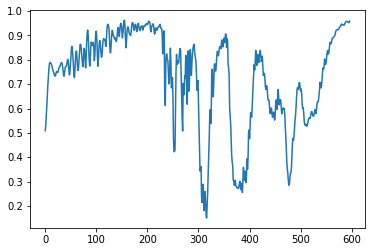

In [178]:
plt.plot(np.array(list_prob_ano).reshape((len(list_prob_ano))))

In [176]:
model_gen.save_weights('weights_gen')
model_disc.save_weights('weights_disc')

In [149]:
res=model_disc.predict(data_split.reshape(len(data_split),1,288))

In [161]:
list_ano=[(i,res[i]) for i in range(len(res)) if res[i]<0.4]
print(len(list_ano)/len(res)*100)
list_ano

6.164236706689537


[(6, array([[0.1814521]], dtype=float32)),
 (7, array([[0.11643767]], dtype=float32)),
 (8, array([[0.33631685]], dtype=float32)),
 (10, array([[0.21488613]], dtype=float32)),
 (11, array([[0.27917153]], dtype=float32)),
 (14, array([[0.15893717]], dtype=float32)),
 (30, array([[0.38978913]], dtype=float32)),
 (39, array([[0.31862506]], dtype=float32)),
 (41, array([[0.34046188]], dtype=float32)),
 (42, array([[0.20832828]], dtype=float32)),
 (60, array([[0.15473168]], dtype=float32)),
 (61, array([[0.15131447]], dtype=float32)),
 (62, array([[0.1785055]], dtype=float32)),
 (63, array([[0.12379353]], dtype=float32)),
 (65, array([[0.16440435]], dtype=float32)),
 (76, array([[0.27006203]], dtype=float32)),
 (79, array([[0.3203844]], dtype=float32)),
 (155, array([[0.12063688]], dtype=float32)),
 (156, array([[0.26267028]], dtype=float32)),
 (157, array([[0.1262673]], dtype=float32)),
 (158, array([[0.3009766]], dtype=float32)),
 (341, array([[0.26501948]], dtype=float32)),
 (353, array(

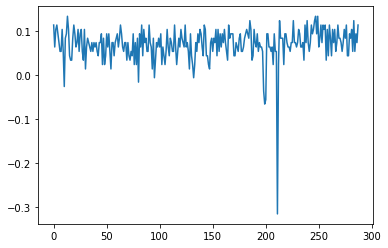

In [166]:
plt.plot(data_split[341])

In [173]:
data_split=data_split[res>0.3]
date_split=date_split[res>0.3]

In [172]:
res=res.reshape((len(res)))

In [174]:
len(data_split)

8967

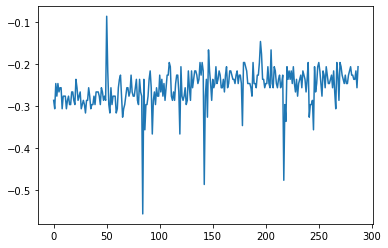

In [33]:
plt.plot(data_split[12])

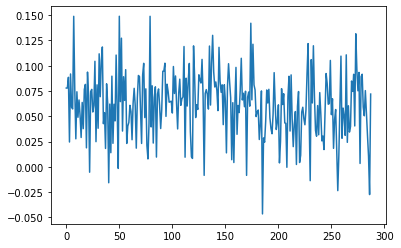

In [51]:
plt.plot(fake[0][0])